The Occupancy Detection Project is a classification tool. This data set is experimental data describing binary classification of the room which inculdes Temperature ,Humidity, Light and CO2 Consists of 7 number of attributes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Analysis

In [2]:
datatrain = pd.read_csv("datatraining.txt")
datatest1 = pd.read_csv("datatest.txt")
datatest2 = pd.read_csv("datatest2.txt")

In [3]:
print('Training Set')
print(datatrain.head())
print()
print('Test Set 1')
print(datatest1.head())
print()
print('Test Set 2')
print(datatest2.head())

Training Set
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  

Test Set 1
                    date  Temperature  Humidity       Light         CO2  \
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144  2015-02-02 14:23:00      23.75

In [4]:
datatrain.describe()

Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean     20.619084    25.731507   119.519375   606.546243       0.003863   
std       1.016916     5.531211   194.755805   314.320877       0.000852   
min      19.000000    16.745000     0.000000   412.750000       0.002674   
25%      19.700000    20.200000     0.000000   439.000000       0.003078   
50%      20.390000    26.222500     0.000000   453.500000       0.003801   
75%      21.390000    30.533333   256.375000   638.833333       0.004352   
max      23.180000    39.117500  1546.333333  2028.500000       0.006476   

         Occupancy  
count  8143.000000  
mean      0.212330  
std       0.408982  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [5]:
datatest1.describe()

Temperature     Humidity        Light          CO2  HumidityRatio  \
count  2665.000000  2665.000000  2665.000000  2665.000000    2665.000000   
mean     21.433876    25.353937   193.227556   717.906470       0.004027   
std       1.028024     2.436842   250.210906   292.681718       0.000611   
min      20.200000    22.100000     0.000000   427.500000       0.003303   
25%      20.650000    23.260000     0.000000   466.000000       0.003529   
50%      20.890000    25.000000     0.000000   580.500000       0.003815   
75%      22.356667    26.856667   442.500000   956.333333       0.004532   
max      24.408333    31.472500  1697.250000  1402.250000       0.005378   

         Occupancy  
count  2665.000000  
mean      0.364728  
std       0.481444  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [6]:
datatest2.describe()

Temperature     Humidity        Light          CO2  HumidityRatio  \
count  9752.000000  9752.000000  9752.000000  9752.000000    9752.000000   
mean     21.001768    29.891910   123.067930   753.224832       0.004589   
std       1.020693     3.952844   208.221275   297.096114       0.000531   
min      19.500000    21.865000     0.000000   484.666667       0.003275   
25%      20.290000    26.642083     0.000000   542.312500       0.004196   
50%      20.790000    30.200000     0.000000   639.000000       0.004593   
75%      21.533333    32.700000   208.250000   831.125000       0.004998   
max      24.390000    39.500000  1581.000000  2076.500000       0.005769   

         Occupancy  
count  9752.000000  
mean      0.210111  
std       0.407408  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

From the Text file data it looks in date column that one column is missing and that data is attached along the date column. 

As we know that date has another mismatched coloumn and there are some lack of quotation marks around the dates.
So, in order to fix this the program below will read line by line and would change "date" to "Date" that would follow the rest of the style of capitalization.
The character present before the first comma would be removed. Further Date column with ququotation marks would be inculded in second data set.

In [7]:
lines_train=[]
with open('datatraining.txt','r') as f:
    lines_train=f.readlines()
    
new_lines_train_data=[]
new_lines_train_data.append(lines_train[0].replace('date','Date'))

for line in lines_train[1:]:
    new_lines_train_data.append(','.join(l for l in line.split(',')[1:]))

with open('train.csv','w') as f:
    f.writelines(new_lines_train_data)
####################################################################################    
test1_data=[]
with open('datatest.txt','r') as f:
    test1_data=f.readlines()
    
lines_test1_data=[]
lines_test1_data.append(test1_data[0].replace('date','Date'))

for line in test1_data[1:]:
    lines_test1_data.append(','.join(l for l in line.split(',')[1:]))

with open('test1.csv','w') as f:
    f.writelines(lines_test1_data)
####################################################################################

lines_test2_data = []
with open('datatest2.txt', 'r') as function1:
    lines_test2_data = function1.readlines()
    
lines_test2_new_data = []
lines_test2_new_data.append(lines_test2_data[0].replace('date', 'Date'))

for line in lines_test2_data[1:]:
    i = line.index(',') + 1
    ii = line[i:].index(',')
    line = line[:i] + '"' + line[i:i+ii] + '"' + line[i+ii:]   
    lines_test2_new_data.append(','.join(l for l in line.split(',')[1:]))
    
with open('test2.csv', 'w') as function1:
    function1.writelines(lines_test2_new_data)

In [8]:
train = pd.read_csv('train.csv')
test1 = pd.read_csv('test1.csv')
test2 = pd.read_csv('test2.csv')

In [9]:
#Info of Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [10]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.9+ KB


In [11]:
np.count_nonzero(train.isnull().values)

0

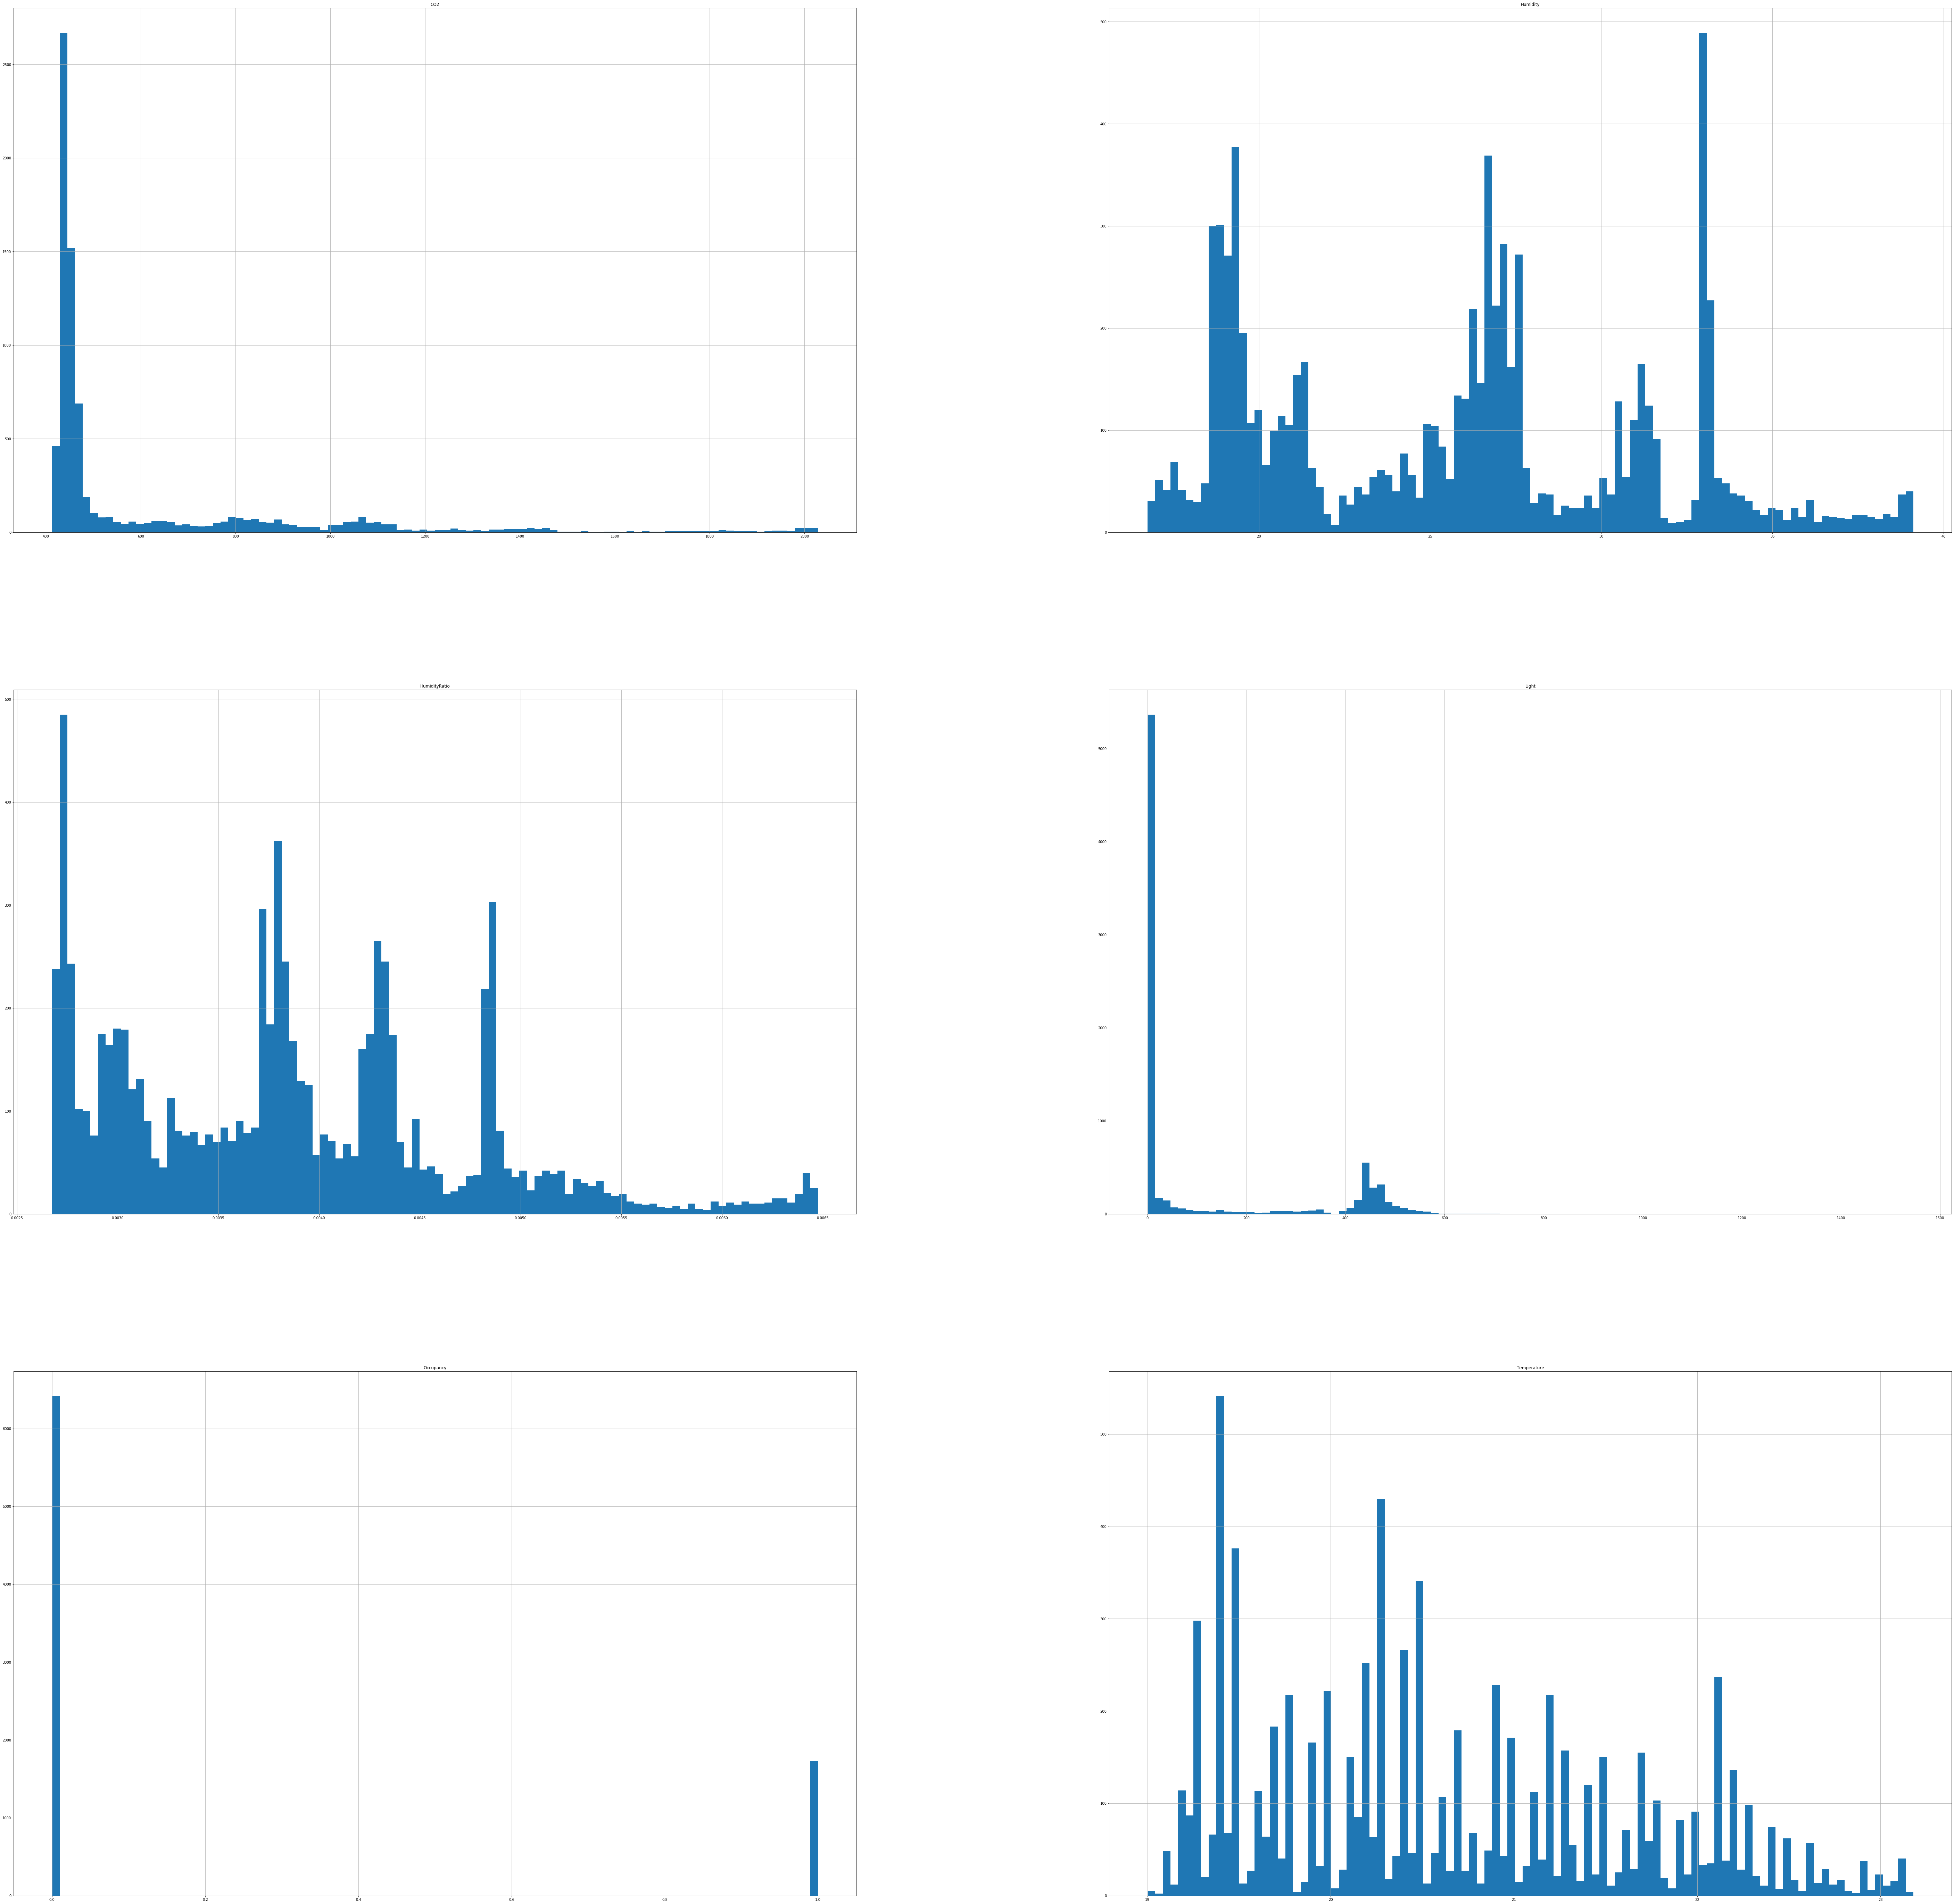

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins = 100, figsize = (100,100))
plt.show()

In [13]:
train.describe()

Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean     20.619084    25.731507   119.519375   606.546243       0.003863   
std       1.016916     5.531211   194.755805   314.320877       0.000852   
min      19.000000    16.745000     0.000000   412.750000       0.002674   
25%      19.700000    20.200000     0.000000   439.000000       0.003078   
50%      20.390000    26.222500     0.000000   453.500000       0.003801   
75%      21.390000    30.533333   256.375000   638.833333       0.004352   
max      23.180000    39.117500  1546.333333  2028.500000       0.006476   

         Occupancy  
count  8143.000000  
mean      0.212330  
std       0.408982  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Since we have low values like humidity_ratio and high values like light and CO2, we should normalize the data to simplfy the learning process

In [14]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(train[columns]))
test1[columns] = scaler.transform(np.array(test1[columns]))
test2[columns] = scaler.transform(np.array(test2[columns]))
train[columns] = scaler.transform(np.array(train[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


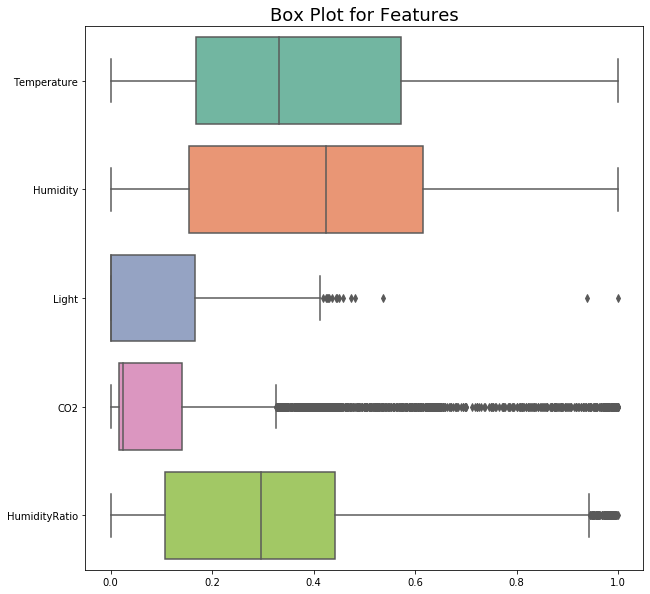

In [15]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=train.drop(['Date', 'Occupancy'],axis=1), orient="h",palette="Set2")
print(train.drop(['Date', 'Occupancy'],axis=1).describe())

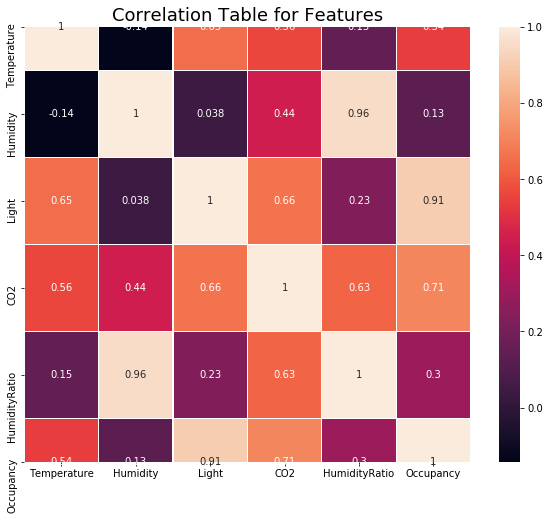

In [16]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(train.corr(), annot=True, linewidths=.1)

This is correlations between occupancy and the others. We can learn from this that light value is
more correlated with occupancy than others.

In [17]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

data = train.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
                                                'y':0.9,
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

The 4th dimension is size of dots here and I used light value as 4th dimension. The higher light will lead to bigger dots and the lower light will lead to smaller dots. Your mouse can be used to change your perspective and take a closer look on the graph.

In [18]:
 #To know the number of row and columns in each dataset text.
print(train.shape)
print(test1.shape)
print(test2.shape)

(8143, 7)
(2665, 7)
(9752, 7)


In [19]:
train.head(5)

Date  Temperature  Humidity     Light       CO2  \
0  2015-02-04 17:51:00     1.000000  0.470533  0.275490  0.190933   
1  2015-02-04 17:51:59     0.992823  0.470332  0.277754  0.186446   
2  2015-02-04 17:53:00     0.992823  0.469326  0.275490  0.186136   
3  2015-02-04 17:54:00     0.992823  0.467315  0.275490  0.182887   
4  2015-02-04 17:55:00     0.980861  0.467315  0.275490  0.180566   

   HumidityRatio  Occupancy  
0       0.557318          1  
1       0.554807          1  
2       0.553761          1  
3       0.551669          1  
4       0.547851          1

In [20]:
test1.head(5)

Date  Temperature  Humidity     Light       CO2  \
0  2015-02-02 14:19:00     1.124402  0.425835  0.378444  0.208231   
1  2015-02-02 14:19:59     1.128708  0.426640  0.374046  0.215163   
2  2015-02-02 14:21:00     1.131579  0.423958  0.370338  0.220898   
3  2015-02-02 14:22:00     1.129785  0.419265  0.319304  0.224045   
4  2015-02-02 14:23:00     1.137321  0.422617  0.315973  0.226675   

   HumidityRatio  Occupancy  
0       0.549737          1  
1       0.551972          1  
2       0.549997          1  
3       0.544374          1  
4       0.550376          1

In [21]:
test2.head(5)

Date  Temperature  Humidity     Light       CO2  \
0  2015-02-11 14:48:00     0.660287  0.643126  0.282820  0.381814   
1  2015-02-11 14:49:00     0.667464  0.637166  0.282820  0.363454   
2  2015-02-11 14:50:00     0.662081  0.642642  0.280664  0.365774   
3  2015-02-11 14:51:00     0.662081  0.642642  0.283897  0.369333   
4  2015-02-11 14:51:59     0.667464  0.643126  0.282820  0.366961   

   HumidityRatio  Occupancy  
0       0.617295          1  
1       0.614025          1  
2       0.617441          1  
3       0.617441          1  
4       0.619737          1

Now, we would have clean data to visualize and none of them have null values in the set.

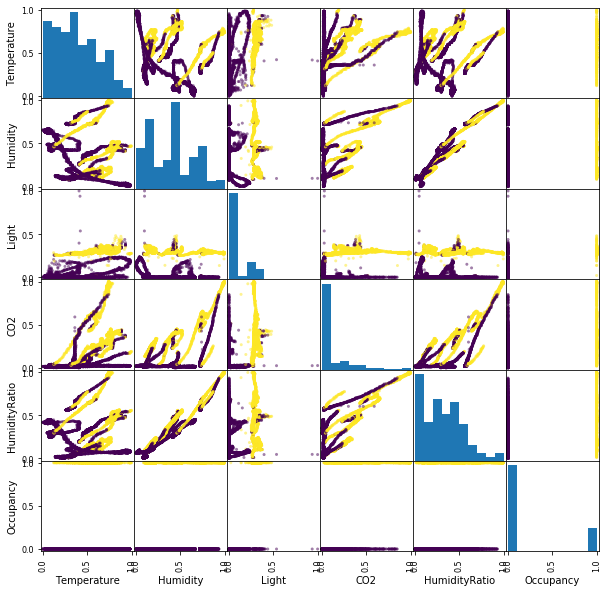

In [22]:
pd.plotting.scatter_matrix(train, c=train['Occupancy'], figsize=[10, 10])
plt.show()

Visualization - Analysis on training data can be concluded on the above graph that Light is needed.Humidity and Humidity ratio is highly correlated. CO2 and humidity ration here together do not give any information. Temperature along with CO2 nor humidity /humidity ratio didnt go well. But Light will corresponds with all the situation. We will go on and see time series in detail with each feature.

In [23]:
from datetime import datetime
# Conversion of date strings to python datetime objects
def dateOrNotToDate(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')

We write function that can change stringdates to python datetime object.
DataFrame works as parameter and then iterates with rows and then replaces the string date to datetime object.

In [24]:
def convert_dates(df):
    for i, date in enumerate(df['Date']):
        df.iloc[i, df.columns.get_loc('Date')] = dateOrNotToDate(date)
convert_dates(train)
convert_dates(test1)
convert_dates(test2)

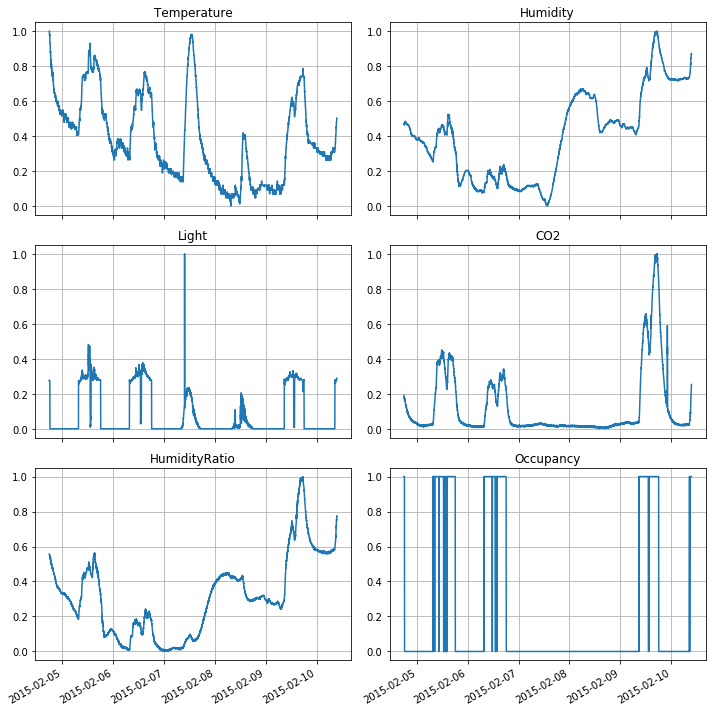

In [25]:
#Plotting each feature in time-series

#plt.style.use('ggplot')
for i, col in enumerate(train.columns.values[1:]):
    plt.subplot(3, 2, i+1)
    plt.plot(train['Date'].values.tolist(), train[col].values.tolist(), label=col)
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.autofmt_xdate()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
    plt.grid(True)
    from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
    
plt.show()

Analysing Occupancy

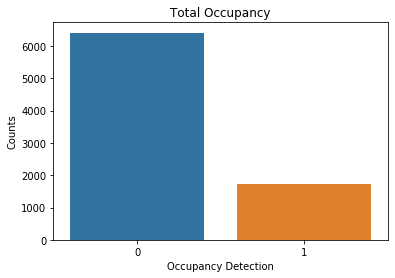

In [26]:
train['Occupancy'].unique()
sns.countplot(train['Occupancy'].values)
plt.xlabel('Occupancy Detection')
plt.ylabel('Counts')
plt.title('Total Occupancy')
plt.show()

In [27]:
hours_1 = []
hours_0 = []
for date in train[train['Occupancy'] == 1]['Date']:
    hours_1.append(date.hour)
for date in train[train['Occupancy'] == 0]['Date']:
    hours_0.append(date.hour)

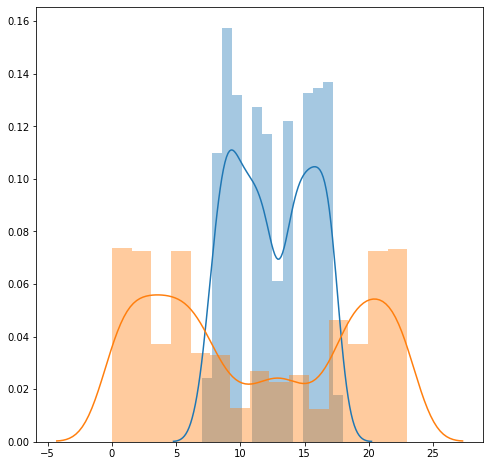

In [28]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

The data is unbalanced here, so we would find another relations between features to strengthen the predictions

In [29]:
#We could see a gap between  2015-02-07 to 2015-02-09
days = [
    'Monday',
    'Tuesday', 
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]
seventh_of_feb = datetime.strptime('2015-02-07', '%Y-%m-%d')
print(days[seventh_of_feb.weekday()])

Saturday


In [30]:
date_list = train.Date.values.tolist()
day_start_indices = []
for i in range(5, 11):
    day_start_indices.append(
        date_list.index(
            datetime.strptime(
                '2015-02-' + str(i) + ' 00:00:00',
                '%Y-%m-%d %H:%M:%S'
            )
        )
    )
day_start_indices = [0] + day_start_indices
print(day_start_indices)

[0, 369, 1809, 3249, 4689, 6129, 7569]


Here, first 369 rows are from 4th of Feb. 
Subsequent rows, from 370 to 1808 are from 5th of Feb.

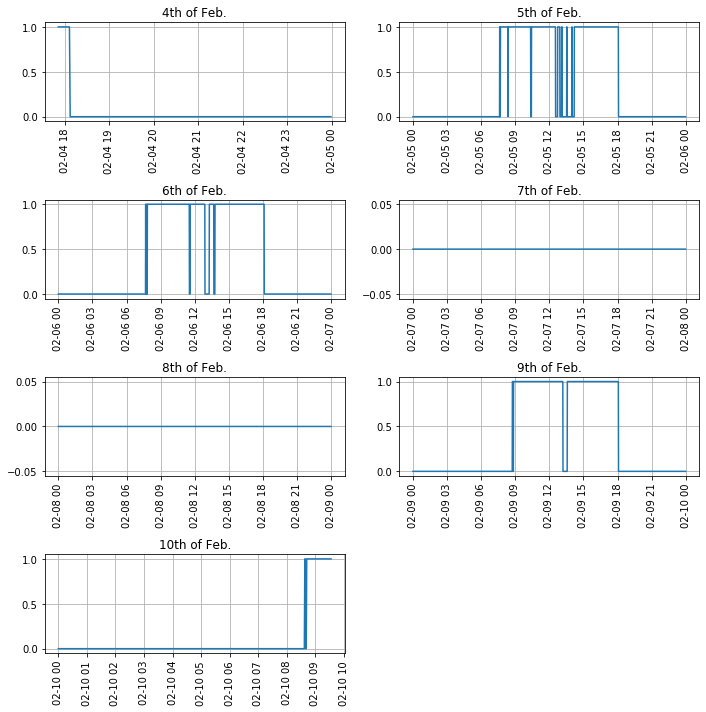

In [31]:
#Plot of occupancy in time series:
for i in range(len(day_start_indices)):    
    plt.subplot(4, 2, i + 1)
    if i != len(day_start_indices) - 1:
        plt.plot(
            date_list[day_start_indices[i]:day_start_indices[i+1]],
            train['Occupancy'].values.tolist()[
                day_start_indices[i]:day_start_indices[i+1]])
    else:
        plt.plot(
            date_list[day_start_indices[i]:],
            train['Occupancy'].values.tolist()[day_start_indices[i]:])
    plt.title(str(i + 4) + 'th of Feb.')
    plt.grid(True)
    plt.xticks(rotation=90)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.set_size_inches(10, 10)
    fig.tight_layout()
plt.show()

There was better working time 8 am and 6 pm. Looks like there is break interval around 1 pm.

In [32]:
# To better know about working hours of office we can print every first and 
#last occurance of the occupancy for each day.

print('Daily Work Hours')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print()
for i in range(len(day_start_indices)-1):
    try:
        print('Start:\t', 
              train.loc[(train.Date > date_list[day_start_indices[i]]) &
                        (train.Date < date_list[day_start_indices[i+1]]) &
                        (train.Occupancy == 1), 'Date'].iloc[0])
        print('End:\t',
              train.loc[(train.Date > date_list[day_start_indices[i]]) &
                        (train.Date < date_list[day_start_indices[i+1]]) &
                        (train.Occupancy == 1), 'Date'].iloc[-1])
    except:
        print('No Occupancy')
    print('########################################')
    print()

Daily Work Hours
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Start:	 2015-02-04 17:51:59
End:	 2015-02-04 18:06:00
########################################

Start:	 2015-02-05 07:38:00
End:	 2015-02-05 18:04:00
########################################

Start:	 2015-02-06 07:40:59
End:	 2015-02-06 18:06:00
########################################

No Occupancy
########################################

No Occupancy
########################################

Start:	 2015-02-09 08:44:59
End:	 2015-02-09 18:04:00
########################################



We can understand the office people do not come before 7.30 and depart after 18.00. 

In [33]:
#Analysing light

lighting = train.loc[
    (train.Date > date_list[day_start_indices[3]]) &
    (train.Date < date_list[day_start_indices[4]]) &
    (train.Light > 400),
    ('Date', 'Light')
]
print(lighting)
#lateedit it was working but stopped showing result now !!

Empty DataFrame
Columns: [Date, Light]
Index: []


Light seems to be less than 400lx at the weekend. 
Day light would be illuminating the room atmost 370lx or so. 
Light is following the same pattern with occupancy. 
There is a sudden increase in the lighting 
at the weekend, possibly on 7th of Feb. Those spots may be outliers.

For CO2 analyes -
CO2 data seemed to be useful, since it also follows occupancy pattern 
just as light does. Fluctuations can be seen when there is an occupant 
in the office.

Conclusion of visualization - We added weekend and working hours as input for better visual. We need to still see for weekend we can check for date is "Saturday or Sunday" or not. If it would be there then Weekend = 1 else weekend = 0.
In the above code for WorkingHours, if time of the day is between 07:30 and 18:00, then WorkingHours = 1, else WorkingHours = 0.

So we started with these new columns with 0s. Those which fit the condition will later take their corresponding values.

In [34]:
def add_features(df):
    df.loc[:, 'Weekend'] = 0
    df.loc[:, 'WorkingHour'] = 0

    for i, date in enumerate(df['Date']):
        if (days[date.weekday()] == 'Saturday') or\
            (days[date.weekday()] == 'Sunday'):
            df.iloc[i, df.columns.get_loc('Weekend')] = 1

        if date.time() >= datetime.strptime('07:30', '%H:%M').time() and\
            date.time() <= datetime.strptime('18:00', '%H:%M').time():
            df.iloc[i, df.columns.get_loc('WorkingHour')] = 1

add_features(train)
add_features(test1)
add_features(test2)

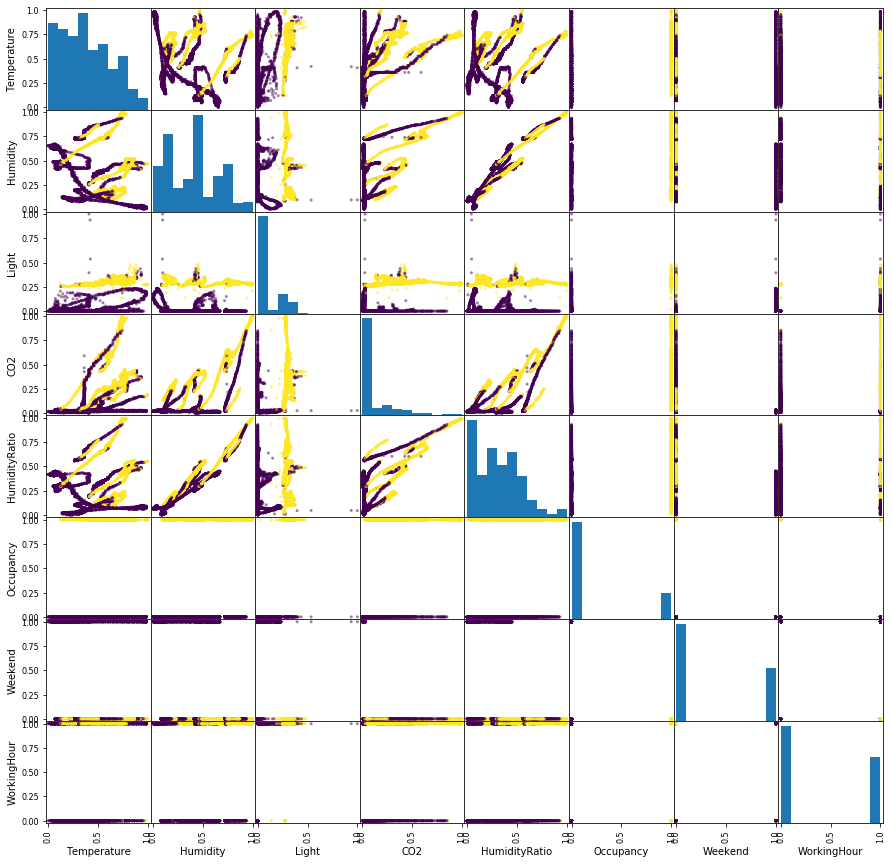

In [35]:
pd.plotting.scatter_matrix(train, c=train['Occupancy'], figsize=[15, 15])
plt.show()

Then in this graph Weekend clearly distinguishes the occupancy. So does the WorkingHour. Weekend and light together seems to be seperable while Weekend with Humidity seems less helpful. Similarly, WorkingHour with CO2 seems very clear and separable.

# MODELING | TRAINING | TESTING

For every algorithm, a table has been presented with several parameters
and different feature combinations. At the end, there is a table that 
shows every algorithm with their best parameters and feature combinations 
alongside their scores for this project.

In [36]:
X_train = train.drop('Occupancy', axis=1)
y_train = train['Occupancy']

X_test1 = test1.drop('Occupancy', axis=1)
y_test1 = test1['Occupancy']

X_test2 = test2.drop('Occupancy', axis=1)
y_test2 = test2['Occupancy']

features_combs_list = [
    ('Weekend', 'WorkingHour'),
    ('Light', 'CO2'),
    ('WorkingHour', 'CO2'),
    ('CO2', 'Temperature'),
    ('Weekend', 'WorkingHour', 'Light', 'CO2'),
    ('Weekend', 'HumidityRatio'),
]

MODELS TO BE DONE


    1. Logistic Regression
    2. KNN
    3. Support Vector Machines
    4. Random Forest
    5. Decision Trees

1. Logistic Regression

In [37]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

hyper_params_space = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1, 1.2, 1.5],
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]
    
    logit = GridSearchCV(LogisticRegression(), hyper_params_space,
                        scoring='accuracy')
    logit.fit(X, y_train)

    print('Best parameters set:')
    print(logit.best_params_)
    print()
    
    preds = [
        (logit.predict(X), y_train, 'Train'),
        (logit.predict(X_t1), y_test1, 'Test1'),
        (logit.predict(X_t2), y_test2, 'Test2')
    ]
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'C': 1, 'penalty': 'l1', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precision    recall  f1-score   support

 

RESULTS SIMULATED FOR LOGISTIC REGRESSION 

| Features                         | Hyper Parameters                               | Train | Test1 | Test2 |
|----------------------------------|------------------------------------------------|-------|-------|-------|
| Weekend, WorkingHour             | {'random_state': 0, 'C': 1, 'penalty': 'l1'}   | 0.96  | 0.96  | 0.94  |
| Light, CO2                       | {'random_state': 0, 'C': 1, 'penalty': 'l2'}   | 0.99  | 0.98  | 0.99  |
| WorkingHour, CO2                 | {'random_state': 0, 'C': 1.2, 'penalty': 'l1'} | 0.95  | 0.93  | 0.87  |
| CO2, Temperature                 | {'random_state': 0, 'C': 1.5, 'penalty': 'l1'} | 0.90  | 0.88  | 0.81  |
| Weekend, WorkingHour, Light, CO2 | {'random_state': 0, 'C': 1.5, 'penalty': 'l1'} | 0.99  | 0.98  | 0.99  |
| Weekend, HumidityRatio           | {'random_state': 0, 'C': 1, 'penalty': 'l1'}   | 0.62  | 0.40  | 0.62  |

2. K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

hyper_params_space = [
    {
        'n_neighbors': np.arange(1, 50),
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    knn = GridSearchCV(KNeighborsClassifier(), hyper_params_space,
                       scoring='accuracy')
    knn.fit(X, y_train)
    
    print('Best parameters set:')
    print(knn.best_params_)
    print()
    
    preds = [
        (knn.predict(X), y_train, 'Train'),
        (knn.predict(X_t1), y_test1, 'Test1'),
        (knn.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()


('Weekend', 'WorkingHour')
Best parameters set:
{'n_neighbors': 1}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       0.99    

RESULTS SIMULATED FOR KNN

| Features                                 | Neighbors | Train | Test1 | Test2 |
|------------------------------------------|-----------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | 1         | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | 33        | 0.99  | 0.98  | 0.97  |
| 'WorkingHour', 'CO2'                     | 1         | 0.99  | 0.88  | 0.82  |
| 'CO2', 'Temperature'                     | 49        | 0.93  | 0.86  | 0.79  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | 33        | 0.99  | 0.98  | 0.97  |
| 'Weekend', 'HumidityRatio'               | 46        | 0.88  | 0.59  | 0.73  |

We will now try to see the same result in the form of graph.

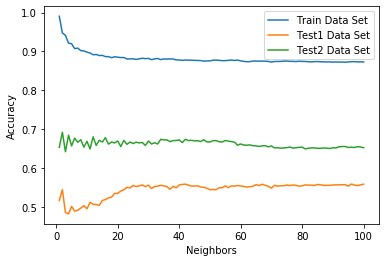

In [39]:
n_neighbors = range(1, 101)
train_data_accuracy = []
test1_data_accuracy = []
test2_data_accuracy = []

for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X, y_train)
    train_data_accuracy.append(knn.score(X, y_train))
    test1_data_accuracy.append(knn.score(X_t1, y_test1))
    test2_data_accuracy.append(knn.score(X_t2, y_test2))
    
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.plot(n_neighbors, test2_data_accuracy, label="Test2 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

3. SVM (Support-Vector Machine)

In [40]:
from sklearn.svm import SVC

hyper_params_space = [
    {
        'kernel': ['linear'],
        'random_state': [0]
    },
    {
        'kernel': ['rbf'],
        'gamma': np.arange(2, 5),
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    svc = GridSearchCV(SVC(), hyper_params_space,
                       scoring='accuracy')
    svc.fit(X, y_train)
    
    print('Best parameters set:')
    print(svc.best_params_)
    print()
    
    preds = [
        (svc.predict(X), y_train, 'Train'),
        (svc.predict(X_t1), y_test1, 'Test1'),
        (svc.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'kernel': 'linear', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precision    recall  f1-score   support

      

RESULTS SIMULATED FOR SVM

| Features                                 | Hyper Paramters                         | Train | Test1 | Test2 |
|------------------------------------------|-----------------------------------------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | {'random_state': 0, 'kernel': 'linear'} | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | {'random_state': 0, 'kernel': 'linear'} | 0.99  | 0.98  | 0.99  |
| 'WorkingHour', 'CO2'                     | {'random_state': 0, 'kernel': 'linear'} | 0.96  | 0.94  | 0.86  |
| 'CO2', 'Temperature'                     | {'random_state': 0, 'kernel': 'linear'} | 0.92  | 0.86  | 0.84  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'random_state': 0, 'kernel': 'linear'} | 0.99  | 0.98  | 0.98  |
| 'Weekend', 'HumidityRatio'               | {'random_state': 0, 'kernel': 'linear'} | 0.62  | 0.40  | 0.62  |

4. Random Forest

In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

hyper_params_space = [
    {
        'max_depth': np.arange(1, 100),
        'min_samples_split': np.arange(2, 5),
        'random_state': [0],
        'n_estimators': np.arange(10, 20)
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    tree = GridSearchCV(RandomForestClassifier(), hyper_params_space, scoring='accuracy')
    tree.fit(X, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print()
    
    preds = [
        (tree.predict(X), y_train, 'Train'),
        (tree.predict(X_t1), y_test1, 'Test1'),
        (tree.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precisi

RESULTS SIMULATED FOR RANDOM FOREST

| Features                                 | Hyper Paramters                                                                 | Train | Test1 | Test2 |
|------------------------------------------|---------------------------------------------------------------------------------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | {'min_samples_split': 2, 'max_depth': 2, 'n_estimators': 10, 'random_state': 0} | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | {'min_samples_split': 2, 'max_depth': 2, 'n_estimators': 18, 'random_state': 0} | 0.99  | 0.98  | 0.99  |
| 'WorkingHour', 'CO2'                     | {'min_samples_split': 2, 'max_depth': 3, 'n_estimators': 10, 'random_state': 0} | 0.98  | 0.96  | 0.89  |
| 'CO2', 'Temperature'                     | {'min_samples_split': 2, 'max_depth': 1, 'n_estimators': 15, 'random_state': 0} | 0.92  | 0.85  | 0.86  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'min_samples_split': 2, 'max_depth': 3, 'n_estimators': 14, 'random_state': 0} | 0.99  | 0.98  | 0.98  |
| 'Weekend', 'HumidityRatio'               | {'min_samples_split': 2, 'max_depth': 1, 'n_estimators': 10, 'random_state': 0} | 0.80  | 0.80  | 0.78  |

5. Decision Tree

In [42]:
 #Decision Tree
from sklearn.tree import DecisionTreeClassifier

hyper_params_space = [
    {
        'max_depth': np.arange(1, 100),
        'min_samples_split': np.arange(2, 5),
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    tree = GridSearchCV(DecisionTreeClassifier(), hyper_params_space,
                       scoring='accuracy')
    tree.fit(X, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print()
    
    preds = [
        (tree.predict(X), y_train, 'Train'),
        (tree.predict(X_t1), y_test1, 'Test1'),
        (tree.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'max_depth': 2, 'min_samples_split': 2, 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precision    recall  f1-sco

RESULTS SIMULATED FOR DECISION TREE

| Features                                 | Hyper Paramters                                             | Train | Test1 | Test2 |
|------------------------------------------|-------------------------------------------------------------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | {'min_samples_split': 2, 'max_depth': 2, 'random_state': 0} | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0} | 0.99  | 0.98  | 0.99  |
| 'WorkingHour', 'CO2'                     | {'min_samples_split': 2, 'max_depth': 3, 'random_state': 0} | 0.98  | 0.96  | 0.89  |
| 'CO2', 'Temperature'                     | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0} | 0.93  | 0.87  | 0.78  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0} | 0.99  | 0.98  | 0.99  |
| 'Weekend', 'HumidityRatio'               | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0} | 0.62  | 0.40  | 0.62  |

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import datetime as dt


def conver_data(file):
    data=file
    data["Date"] = pd.to_datetime(data["Date"])
    data["year"] = data["Date"].dt.year
    data["month"] = data["Date"].dt.month
    data["day"] = data["Date"].dt.day
    data["hour"] = data["Date"].dt.hour
    data["minute"] = data["Date"].dt.minute
    data["second"] = data["Date"].dt.second
    data['weekday'] = data[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)
    return data

def concat_data(d1,d2):
    data = pd.concat([d1,d2])
    return data

occ_uncon=concat_data(train,test1)
occ_uncon=concat_data(occ_uncon,test2)
occ_ttrain=conver_data(occ_uncon)
occ_ttrain =occ_ttrain[['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']]

X = occ_ttrain[['Temperature','Humidity','Light','CO2','HumidityRatio']]
y = occ_ttrain[['Occupancy']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 1,random_state=42)
decisionTree = DecisionTreeClassifier(max_depth=3)
decisionTree.fit(X_train, y_train)

predictions=decisionTree.predict(X_test)
print ("Accuracy of Decision Tree",accuracy_score(y_test,predictions))

print (decisionTree.feature_importances_)
print (X.columns)

Accuracy of Decision Tree 1.0
[0.00000000e+00 1.29437417e-03 9.95606199e-01 2.52304814e-03
 5.76378318e-04]
Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')


In [44]:
from sklearn.tree import export_graphviz

with open("tree4.dot", "w") as output_file:
    export_graphviz(decisionTree, feature_names=X.columns, out_file=output_file)

In [45]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree4.dot')
graph.write_png('tree4.png')

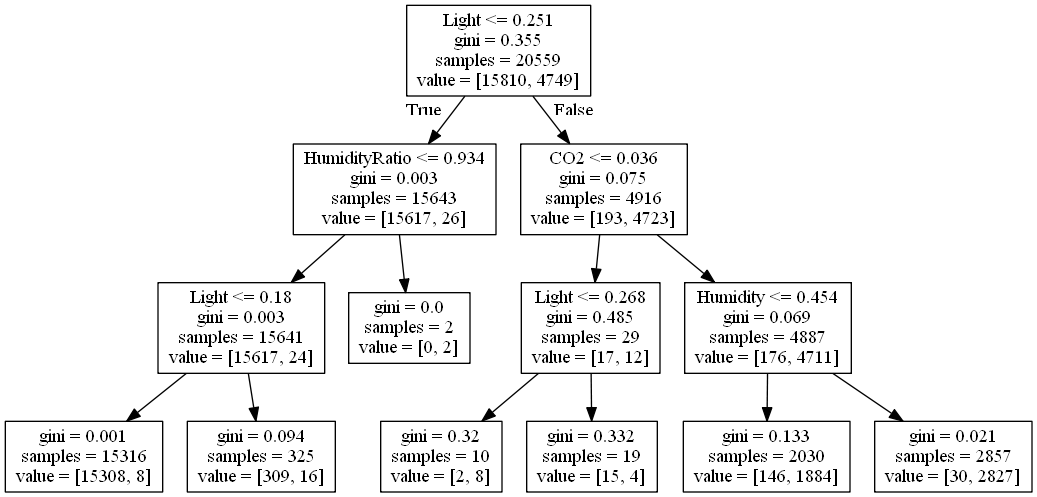

In [46]:
from IPython.core.display import Image
Image(filename='tree4.png')

Here is our last simulation result, a tree with depth three.

CONCLUSION OF ALL THE MODELS  

| Model                     | Features                                 | Parameters                                                                      | Training Accuracy | Test1 Accuracy | Test2 Accuracy |
|---------------------------|------------------------------------------|---------------------------------------------------------------------------------|-------------------|----------------|----------------|
| Logistic Regression       | 'Light', 'CO2'                           | {'random_state': 0, 'C': 1.5, 'penalty': 'l1'}                                  | 0.99              | 0.98           | 0.99           |
| K-Nearest Neighbors       | 'Light', 'CO2'                           | {'n_neighbors': 33}                                                             | 0.99              | 0.98           | 0.97           |
| Decision Tree             | 'Light', 'CO2'                           | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0}                     | 0.99              | 0.98           | 0.99           |
| Random Forest             | 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'min_samples_split': 2, 'max_depth': 3, 'n_estimators': 14, 'random_state': 0} | 0.99              | 0.98           | 0.98           |
| Kernelized SVM            | 'Light', 'CO2'                           | {'random_state': 0, 'kernel': 'linear'}                                         | 0.99              | 0.98           | 0.99           |

So, from the models we can conclude that Light and CO2 alone have got better results in all of the circumstances. There were few instances where a particular model did not performan well but overall it was good.



References :-

1. https://github.com/kralmachine/OccupancyDetectionProject
2. https://github.com/shauryauppal/Occupancy-Detection
3. https://github.com/chandan-u/Occupancy-Detection-Prediction-models#description
4. https://github.com/mashmn/OccupancyDetection
5. https://github.com/LuisM78/Occupancy-Detection-1
6. https://github.com/thomaskeeley/Occupancy-Detection
7. https://www.kaggle.com/turksoyomer/hvac-occupancy-detection-with-ml-and-dl-methods
8. https://www-sciencedirect-com.libaccess.sjlibrary.org/science/article/pii/S0378778815304357 